# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [17]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()
print(clean_hospital_read_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 13666 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB
None


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


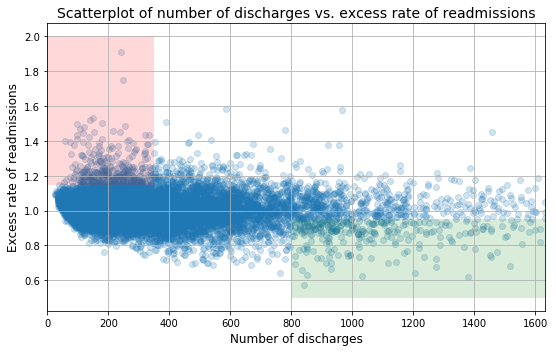

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

# A.

I dont agree with the above analysis and recommendations since that is only based on EDA not the statistics. We are supposed to conduct statistics analysis to be able to come up with such a solution. This analysis assumes that there is a signifant difference between the two groups.

# B.

In this exercise, I am plannig to apply t-test statistics analysis. 

Null Hypothesis : H0: Mu1 = Mu2

There is  no difference between the means of Excess Readmission RAtios of Hospitals with discharges <= 100 and >= 1000

Alternative Hypothesis : H1 : Mu1 != Mu2

There is  a significant difference between the means of Excess Readmission RAtios of Hospitals with discharges <= 100 and >= 1000

In [21]:
# Hypothesis Test

MinorHospital= clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <= 100) & 
                                 (clean_hospital_read_df['Number of Discharges'] != 0)]
MajorHospital= clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 100)]



In [22]:
import scipy.stats as stat

MinorExcess = MinorHospital['Excess Readmission Ratio']
MajorExcess = MajorHospital['Excess Readmission Ratio']

results = stat.ttest_ind(MinorExcess,MajorExcess,equal_var=False) # The equality of the variations of the samples are 
                                                                  # not known
    
print("Test statistic is equal to : {0}  p-value equal to: {1}".format(results[0],results[1]))

Test statistic is equal to : 8.557557369392756  p-value equal to: 2.193559278739173e-17


# C.

Since p is lower than 0.01, we can reject the null hypothesis that there is no significant difference between the two  groups of hospitals.

# D.

Statistical significance refers to the unlikelihood that mean differences observed in the sample have occurred due to sampling error. Given a large enough sample, despite seemingly insignificant population differences, one might still find statistical significance. 

Practical significance looks at whether the difference is large enough to be of value in a practical sense. 

Significance Level: Is denoted by the Greek letter alpha (α). If the P value we calculate is as small or smaller than α, we say the data is statistically significant at level α.

Practical significance is not the same as statistical significance.
  ● A general problem with traditional statistics is that if you take large enough samples, almost any difference or any correlation will be significant.
  ● Due to this problem, many editors and publishers are requiring authors to include some information surrounding the practical significance of their findings.
  ● Significant study results vary based on context. Can significant study results ever be translated into recommendations for the general public? We know so far that:
    * Tests of statistical significance rarely tell us about the importance of a research result.
    * Effect size tells us about magnitude of difference, which is important, but it is difficult for practice-oriented practitioners to comprehend. (Effect size is a measure of the strength of the relationship between two variables. In a research setting, it is not only helpful to know whether results have a statistically significant effect, but also the magnitude of any observed effects)

In this problem, statistical and practical significance differ. Since the p-value is lower than alpha, we can say that the data is statistically significant at level Alpha.

However, practical significance here is related to effect size. Here it seems from the EDA that there is no practical significance.